In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

# Load dataset
df = pd.read_csv("CombinedWarData.csv")

# ------------------------------
# Task 3: Predict Number of Deaths (Regression)
# ------------------------------
# Use BatDeath as target; clean and encode data
reg_df = df[['BatDeath', 'WarType', 'SideA', 'SideB', 'WhereFought', 'StartYear1']].dropna()

# Encode categorical columns
for col in ['SideA', 'SideB']:
    reg_df[col] = LabelEncoder().fit_transform(reg_df[col].astype(str))

# Features and target
X_reg = reg_df[['WarType', 'SideA', 'SideB', 'WhereFought', 'StartYear1']]
y_reg = reg_df['BatDeath']

# Train-test split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train regression model
reg_model = LinearRegression()
reg_model.fit(Xr_train, yr_train)

# Predict and evaluate
reg_preds = reg_model.predict(Xr_test)
reg_mse = mean_squared_error(yr_test, reg_preds)
print("\n--- Regression Task: Predict Deaths ---")
print(f"Mean Squared Error: {reg_mse:.2f}")

# ------------------------------
# Task 4: Predict Conflict Type (Classification)
# ------------------------------
# Use WarType as target; clean and encode data
cls_df = df[['WarType', 'SideA', 'SideB', 'WhereFought', 'StartYear1']].dropna()

# Encode categorical columns
for col in ['SideA', 'SideB']:
    cls_df[col] = LabelEncoder().fit_transform(cls_df[col].astype(str))

# Features and target
X_cls = cls_df[['SideA', 'SideB', 'WhereFought', 'StartYear1']]
y_cls = cls_df['WarType']

# Train-test split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Train classifier
cls_model = RandomForestClassifier(random_state=42)
cls_model.fit(Xc_train, yc_train)

# Predict and evaluate
cls_preds = cls_model.predict(Xc_test)
cls_acc = accuracy_score(yc_test, cls_preds)
print("\n--- Classification Task: Predict Conflict Type ---")
print(f"Accuracy: {cls_acc:.2f}")
print("Classification Report:")
print(classification_report(yc_test, cls_preds))



In [35]:
# ------------------------------
# Predicting with Custom Inputs
# ------------------------------

# Example input for regression (predict deaths)
# Format: [WarType, SideA, SideB, WhereFought, StartYear1]
sample_input_reg = pd.DataFrame([[1, 1, 710, 1, 2007]], columns=X_reg.columns)
predicted_deaths = reg_model.predict(sample_input_reg)
print(f"Predicted Battle Deaths (Modern Conflict): {int(predicted_deaths[0])}")

# Example input for classification (predict conflict type)
# Format: [SideA, SideB, WhereFought, StartYear1]
sample_input_cls = pd.DataFrame([[30, 40, 5, 2010]], columns=X_cls.columns)
predicted_type = cls_model.predict(sample_input_cls)
print("Predicted Conflict Type (Modern Conflict):", int(predicted_type[0]))


Predicted Battle Deaths (Modern Conflict): 22641
Predicted Conflict Type (Modern Conflict): 4


In [5]:

# Print the unique values for each relevant column to see the mappings
print("Unique WarTypes (Conflict Types):")
print(df['WarType'].unique())

print("\nUnique SideA Values (First Party in Conflict):")
print(df['SideA'].unique())

print("\nUnique SideB Values (Second Party in Conflict):")
print(df['SideB'].unique())

print("\nUnique WhereFought Values (Location of Conflict):")
print(df['WhereFought'].unique())


Unique WarTypes (Conflict Types):
[3 2 1 5 6 4 7 8 9]

Unique SideA Values (First Party in Conflict):
['Netherlands' 'United Kingdom' 'Ottoman Empire' 'Spain' 'Brazil' 'Russia'
 'France' 'Peru' 'Argentina' '-8' 'Prussia' 'Austria'
 'Turkey/Ottoman Empire/Egypt' 'Two Sicilies' 'United States' 'Egypt'
 'Austria-Hungary' 'Serbia' 'Italy' 'Portugal' 'Belgium' 'Japan'
 'United States of America' 'Ethiopia' 'Germany' 'China' 'USSR' 'India'
 'Indonesia' 'South Africa' 'Morocco' 'Mauritania' 'Vietnam' 'Cambodia'
 'Afghanistan' 'Turkey' 'Israel' 'Australia' 'Canada' 'Poland' 'Ukraine'
 'Iraq' 'Republic of Korea' nan 'Sidon' 'Sardinia' 'Mexico' 'Palestinians'
 'Egypt & Bashir' 'Lebanese Maronites' 'Colombia' 'Maronites' 'Mayans'
 'Venezuela' 'Chile' 'Santee Sioux' 'Boliva' 'Haiti' 'Bolivia' 'Korea'
 'Ecuador' 'Uruguay' 'Romania' 'Iran' 'Paraguay' 'Cuba' 'Finland'
 'Ukraine Poles' 'Socialists' 'Hungary' 'Anhui army' 'Blackshirts'
 'Chihli army' 'Bulgaria' 'Honduras' 'Feng Yu-Lxiang army'
 "War Lo

In [6]:
import tkinter as tk
from tkinter import messagebox

# Function to handle form submission
def submit_data():
    war_type = war_type_var.get()
    side_a = side_a_var.get()
    side_b = side_b_var.get()
    location = location_var.get()

    if not war_type or not side_a or not side_b or not location:
        messagebox.showwarning("Input Error", "Please select all fields.")
    else:
        messagebox.showinfo("Data Submitted", f"War Type: {war_type}\nSide A: {side_a}\nSide B: {side_b}\nLocation: {location}")

# Create the main window
root = tk.Tk()
root.title("War Data Entry")

# Set up the layout
root.geometry("400x300")
root.config(padx=10, pady=10)

# Labels and options for War Type
war_type_var = tk.StringVar()
war_type_label = tk.Label(root, text="Select War Type:")
war_type_label.grid(row=0, column=0, sticky="w", pady=5)
war_type_options = ["Conventional War", "Guerrilla Warfare", "Civil War", "Insurgency", "Ethnic Conflict", "Religious Conflict", "Border Conflict", "Proxy War", "Rebellion"]
war_type_menu = tk.OptionMenu(root, war_type_var, *war_type_options)
war_type_menu.grid(row=0, column=1, pady=5)

# Labels and options for Side A
side_a_var = tk.StringVar()
side_a_label = tk.Label(root, text="Select Side A:")
side_a_label.grid(row=1, column=0, sticky="w", pady=5)
side_a_options = ["United Kingdom", "France", "Germany", "USA", "Russia", "China", "Japan", "Italy"]
side_a_menu = tk.OptionMenu(root, side_a_var, *side_a_options)
side_a_menu.grid(row=1, column=1, pady=5)

# Labels and options for Side B
side_b_var = tk.StringVar()
side_b_label = tk.Label(root, text="Select Side B:")
side_b_label.grid(row=2, column=0, sticky="w", pady=5)
side_b_options = ["United Kingdom", "France", "Germany", "USA", "Russia", "China", "Japan", "Italy"]
side_b_menu = tk.OptionMenu(root, side_b_var, *side_b_options)
side_b_menu.grid(row=2, column=1, pady=5)

# Labels and options for Location
location_var = tk.StringVar()
location_label = tk.Label(root, text="Select Where Fought:")
location_label.grid(row=3, column=0, sticky="w", pady=5)
location_options = ["Europe", "Asia", "Africa", "Middle East", "North America", "South America", "Oceania"]
location_menu = tk.OptionMenu(root, location_var, *location_options)
location_menu.grid(row=3, column=1, pady=5)

# Submit Button
submit_button = tk.Button(root, text="Submit", command=submit_data)
submit_button.grid(row=4, column=0, columnspan=2, pady=20)

# Run the main loop
root.mainloop()


Task 1: War Outcome Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.72      0.72       113
           2       0.49      0.49      0.49        47
           3       0.36      0.50      0.42         8
           4       0.42      0.47      0.44        17
           5       1.00      0.67      0.80         3
           6       0.60      0.43      0.50        14
           7       0.33      0.40      0.36         5
           8       0.00      0.00      0.00         1

    accuracy                           0.61       208
   macro avg       0.49      0.46      0.47       208
weighted avg       0.61      0.61      0.61       208



C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

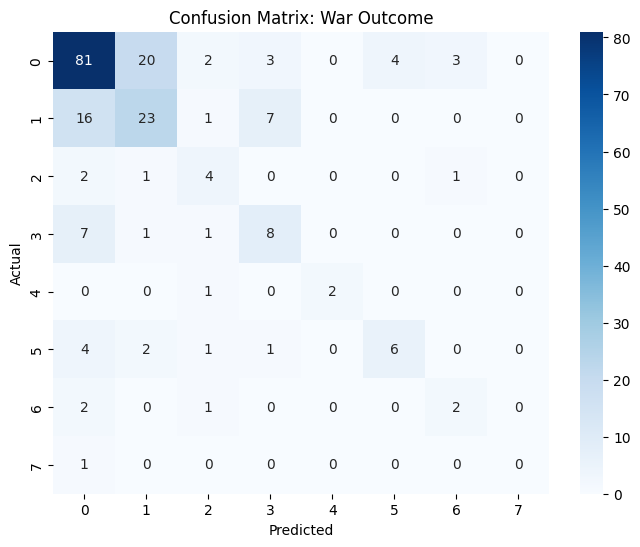

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation F1-Weighted Scores (Outcome): [0.4262854  0.3167858  0.27128403 0.38304816 0.26293682]
Average CV F1-Weighted Score: 0.332 ± 0.064

Task 2: War Duration Regression Metrics:
Mean Squared Error: 6.19
R^2 Score: 0.258


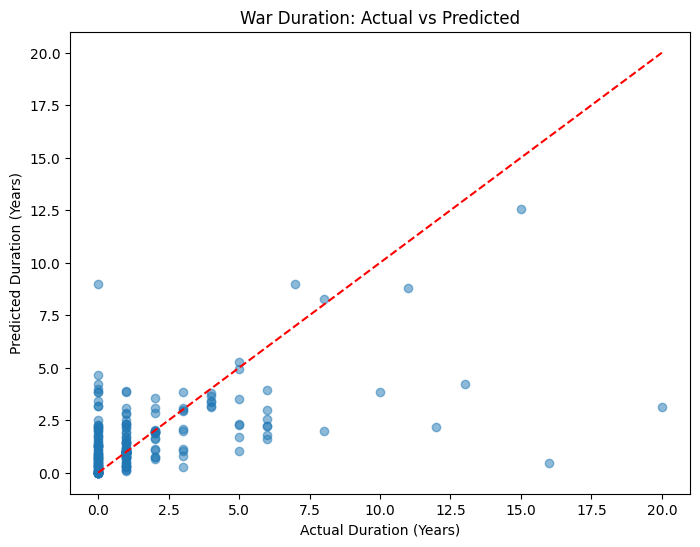


Task 3: Casualty Counts Regression Metrics:
Mean Squared Error: 285651512712.42
R^2 Score: 0.186


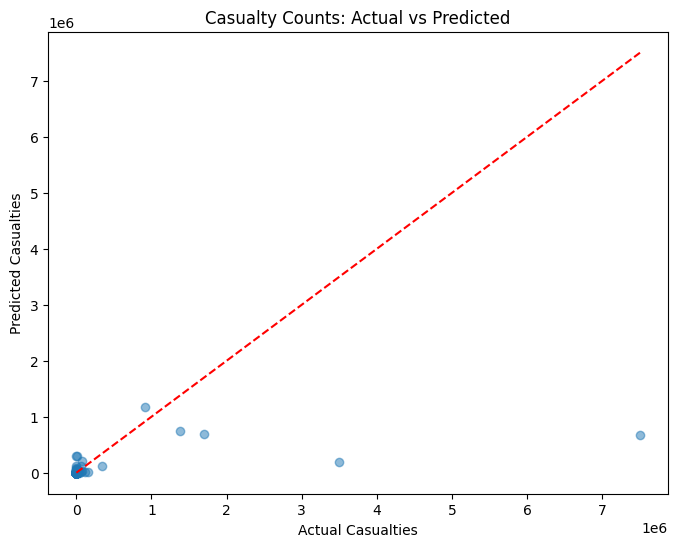

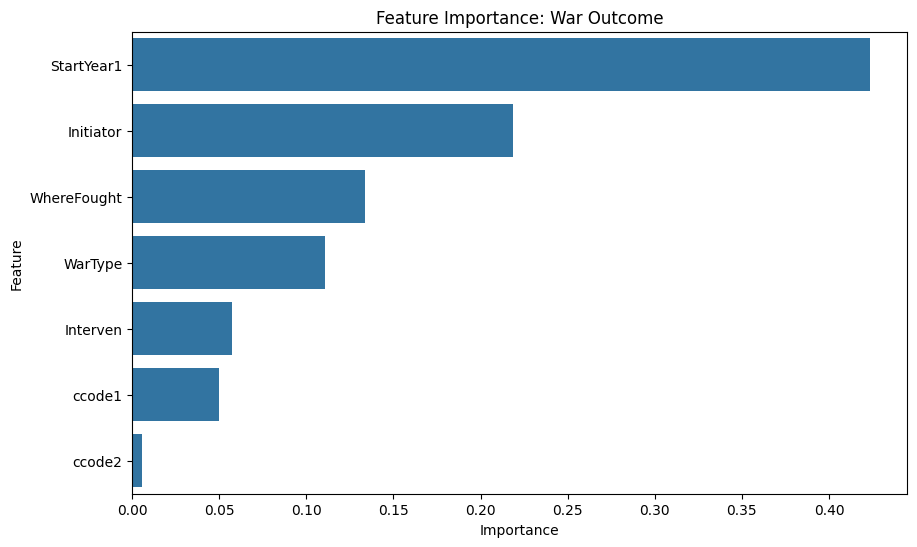


Feature Importance for War Outcome:
       Feature  Importance
4   StartYear1    0.423682
1    Initiator    0.218384
3  WhereFought    0.133621
0      WarType    0.110939
2     Interven    0.057538
5       ccode1    0.050043
6       ccode2    0.005793


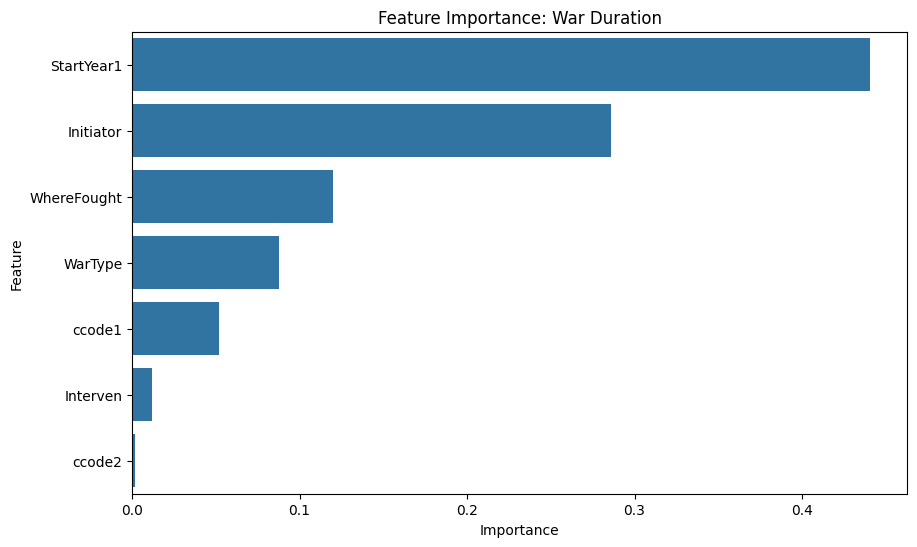


Feature Importance for War Duration:
       Feature  Importance
4   StartYear1    0.440752
1    Initiator    0.286025
3  WhereFought    0.120193
0      WarType    0.087501
5       ccode1    0.051950
2     Interven    0.011963
6       ccode2    0.001615


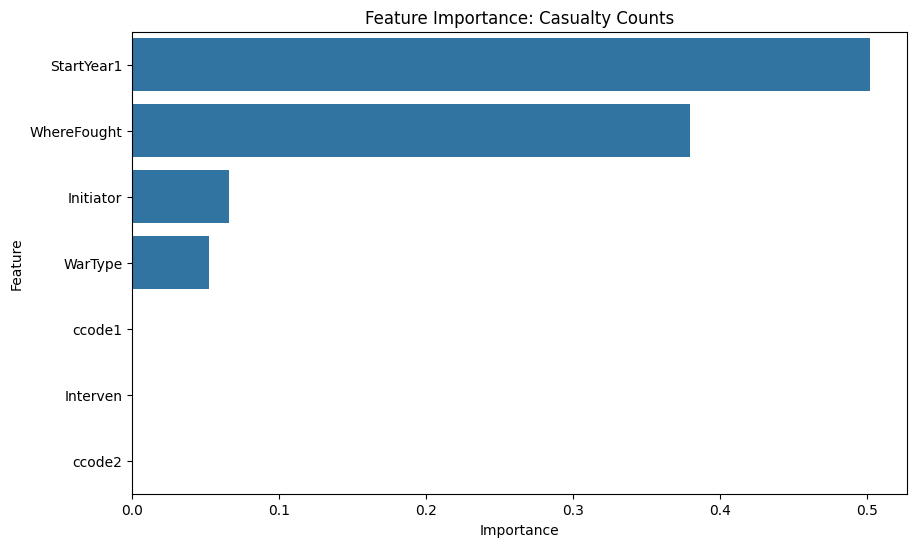


Feature Importance for Casualty Counts:
       Feature    Importance
4   StartYear1  5.022776e-01
3  WhereFought  3.796146e-01
1    Initiator  6.582630e-02
0      WarType  5.195585e-02
5       ccode1  2.711795e-04
2     Interven  5.398428e-05
6       ccode2  4.648555e-07

Sample Input:
     WarType  Initiator  Interven  WhereFought  StartYear1  ccode1  ccode2
310        0          3         0            1      1914.0   220.0   417.5
Predicted Outcome: 2
Predicted Duration (Years): 3.09
Predicted Casualties: 697354.53


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('CombinedWarData.csv')

# Step 1: Data Preprocessing
# Handle missing values (-8, -9)
missing_values = [-8, -9]
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].replace(missing_values, np.nan)

# Select features for all tasks
features = [
    'WarType', 'Initiator', 'Interven', 'WhereFought',
    'StartYear1', 'ccode1', 'ccode2'
]
# Note: BatDeath and DurationYears will be used as targets, so not included as features initially

# Calculate war duration as a feature and target
df['DurationYears'] = df['EndYear1'] - df['StartYear1']
df['DurationYears'] = df['DurationYears'].clip(lower=0)  # Handle negative durations

# Handle missing values
# Drop rows where all targets are missing
df = df.dropna(subset=['Outcome', 'DurationYears', 'BatDeath'], how='all')

# Impute numerical columns with median
numerical_cols = ['StartYear1', 'ccode1', 'ccode2', 'BatDeath', 'DurationYears']
for col in numerical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Impute categorical columns with mode
categorical_cols = ['WarType', 'Initiator', 'Interven', 'WhereFought']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# Step 2: Prepare Data for Each Task
# Task 1: War Outcome (Classification)
df_outcome = df.dropna(subset=['Outcome'])
X_outcome = df_outcome[features]
y_outcome = df_outcome['Outcome'].astype(int)

# Task 2: War Duration (Regression)
df_duration = df.dropna(subset=['DurationYears'])
X_duration = df_duration[features]
y_duration = df_duration['DurationYears']

# Task 3: Casualty Counts (Regression)
df_casualties = df.dropna(subset=['BatDeath'])
X_casualties = df_casualties[features]
y_casualties = df_casualties['BatDeath'].clip(lower=0)  # Ensure non-negative

# Step 3: Train-Test Split
X_outcome_train, X_outcome_test, y_outcome_train, y_outcome_test = train_test_split(
    X_outcome, y_outcome, test_size=0.2, random_state=42
)
X_duration_train, X_duration_test, y_duration_train, y_duration_test = train_test_split(
    X_duration, y_duration, test_size=0.2, random_state=42
)
X_casualties_train, X_casualties_test, y_casualties_train, y_casualties_test = train_test_split(
    X_casualties, y_casualties, test_size=0.2, random_state=42
)

# Step 4: Train Models
# Task 1: War Outcome (Random Forest Classifier)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_classifier.fit(X_outcome_train, y_outcome_train)

# Task 2: War Duration (Random Forest Regressor)
rf_duration = RandomForestRegressor(n_estimators=100, random_state=42)
rf_duration.fit(X_duration_train, y_duration_train)

# Task 3: Casualty Counts (Random Forest Regressor)
rf_casualties = RandomForestRegressor(n_estimators=100, random_state=42)
rf_casualties.fit(X_casualties_train, y_casualties_train)

# Step 5: Evaluate Models
# Task 1: War Outcome
y_outcome_pred = rf_classifier.predict(X_outcome_test)
print("Task 1: War Outcome Classification Report:")
print(classification_report(y_outcome_test, y_outcome_pred))

# Confusion matrix
cm = confusion_matrix(y_outcome_test, y_outcome_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: War Outcome')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Cross-validation
cv_scores_outcome = cross_val_score(rf_classifier, X_outcome, y_outcome, cv=5, scoring='f1_weighted')
print(f"Cross-Validation F1-Weighted Scores (Outcome): {cv_scores_outcome}")
print(f"Average CV F1-Weighted Score: {cv_scores_outcome.mean():.3f} ± {cv_scores_outcome.std():.3f}")

# Task 2: War Duration
y_duration_pred = rf_duration.predict(X_duration_test)
mse_duration = mean_squared_error(y_duration_test, y_duration_pred)
r2_duration = r2_score(y_duration_test, y_duration_pred)
print("\nTask 2: War Duration Regression Metrics:")
print(f"Mean Squared Error: {mse_duration:.2f}")
print(f"R^2 Score: {r2_duration:.3f}")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_duration_test, y_duration_pred, alpha=0.5)
plt.plot([y_duration_test.min(), y_duration_test.max()], [y_duration_test.min(), y_duration_test.max()], 'r--')
plt.xlabel('Actual Duration (Years)')
plt.ylabel('Predicted Duration (Years)')
plt.title('War Duration: Actual vs Predicted')
plt.show()

# Task 3: Casualty Counts
y_casualties_pred = rf_casualties.predict(X_casualties_test)
mse_casualties = mean_squared_error(y_casualties_test, y_casualties_pred)
r2_casualties = r2_score(y_casualties_test, y_casualties_pred)
print("\nTask 3: Casualty Counts Regression Metrics:")
print(f"Mean Squared Error: {mse_casualties:.2f}")
print(f"R^2 Score: {r2_casualties:.3f}")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_casualties_test, y_casualties_pred, alpha=0.5)
plt.plot([y_casualties_test.min(), y_casualties_test.max()], [y_casualties_test.min(), y_casualties_test.max()], 'r--')
plt.xlabel('Actual Casualties')
plt.ylabel('Predicted Casualties')
plt.title('Casualty Counts: Actual vs Predicted')
plt.show()

# Step 6: Feature Importance
def plot_feature_importance(model, features, task_name):
    importance = pd.DataFrame({
        'Feature': features,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance)
    plt.title(f'Feature Importance: {task_name}')
    plt.show()
    print(f"\nFeature Importance for {task_name}:")
    print(importance)

plot_feature_importance(rf_classifier, features, "War Outcome")
plot_feature_importance(rf_duration, features, "War Duration")
plot_feature_importance(rf_casualties, features, "Casualty Counts")

# Step 7: Example Predictions
# Use a sample from the test set
sample_input = X_outcome_test.iloc[0:1]
print("\nSample Input:")
print(sample_input)

# Predict for each task
outcome_pred = rf_classifier.predict(sample_input)
duration_pred = rf_duration.predict(sample_input)
casualties_pred = rf_casualties.predict(sample_input)

print(f"Predicted Outcome: {outcome_pred[0]}")
print(f"Predicted Duration (Years): {duration_pred[0]:.2f}")
print(f"Predicted Casualties: {casualties_pred[0]:.2f}")

In [4]:
input_data = {
    'WarType': 1,  # Interstate
    'Initiator': 2,  # Pakistan
    'Interven': 0,  # No intervention
    'WhereFought': 3,  # Kashmir
    'StartYear1': 2025,
    'ccode1': 770,  # Pakistan
    'ccode2': 750  # India
}
sample_input = pd.DataFrame([input_data])

In [5]:
outcome_pred = rf_classifier.predict(sample_input)
duration_pred = rf_duration.predict(sample_input)
casualties_pred = rf_casualties.predict(sample_input)

print(f"Predicted Outcome: {outcome_pred[0]}")
print(f"Predicted Duration (Years): {duration_pred[0]:.2f}")
print(f"Predicted Casualties: {casualties_pred[0]:.2f}")

Predicted Outcome: 4
Predicted Duration (Years): 2.18
Predicted Casualties: 24293.48


War Duration Regression Metrics:
Mean Squared Error: 3.95
R^2 Score: 0.358


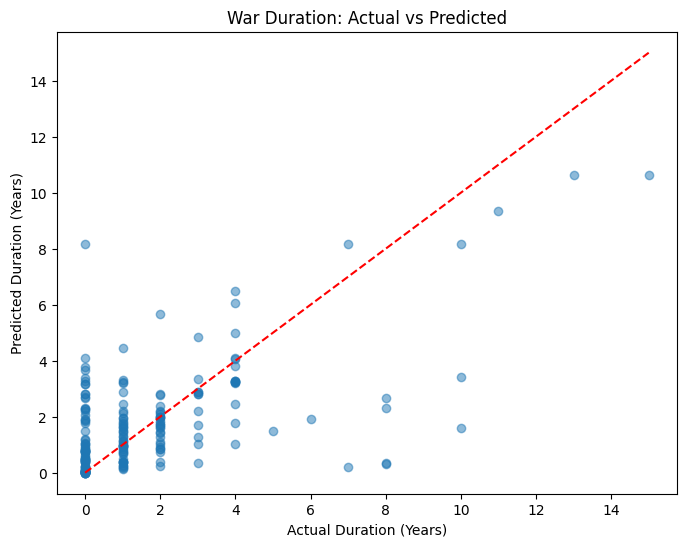


Casualty Counts Regression Metrics:
Mean Squared Error: 36104231737.16
R^2 Score: -0.096


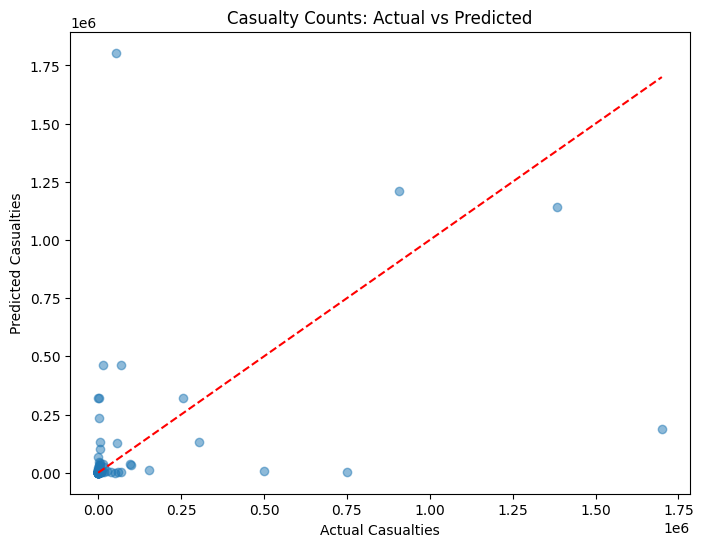

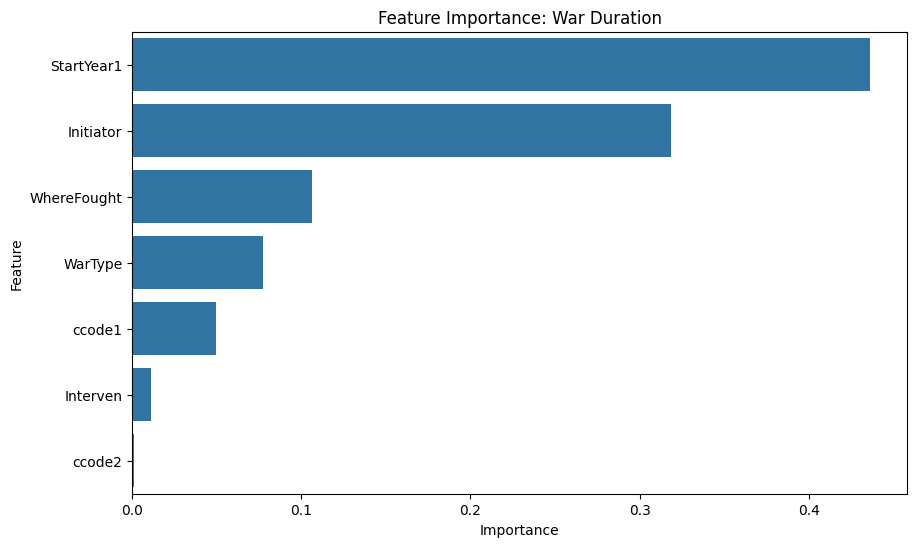


Feature Importance for War Duration:
       Feature  Importance
4   StartYear1    0.436317
1    Initiator    0.318590
3  WhereFought    0.106443
0      WarType    0.077070
5       ccode1    0.049272
2     Interven    0.011089
6       ccode2    0.001219


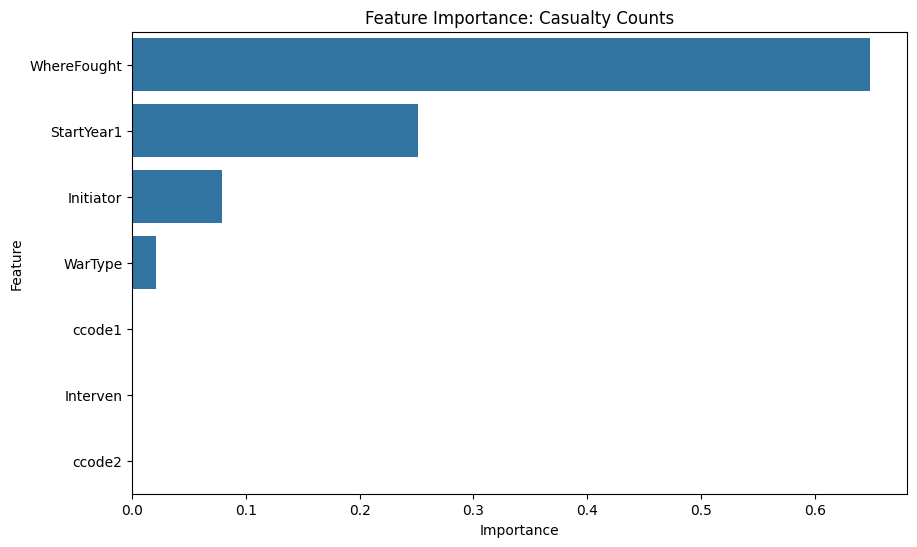


Feature Importance for Casualty Counts:
       Feature    Importance
3  WhereFought  6.487840e-01
4   StartYear1  2.516176e-01
1    Initiator  7.879682e-02
0      WarType  2.068268e-02
5       ccode1  1.011240e-04
2     Interven  1.780157e-05
6       ccode2  6.043784e-08

Sample Input:
     WarType  Initiator  Interven  WhereFought  StartYear1  ccode1  ccode2
199        0          1         0           10      1823.0   220.0   417.5
Predicted Duration (Years): 0.45
Predicted Casualties: 7154.03


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('CombinedWarData.csv')

# Step 1: Data Preprocessing
# Handle missing values (-8, -9)
missing_values = [-8, -9]
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].replace(missing_values, np.nan)

# Select features
features = ['WarType', 'Initiator', 'Interven', 'WhereFought', 'StartYear1', 'ccode1', 'ccode2']

# Calculate war duration as a feature and target
df['DurationYears'] = df['EndYear1'] - df['StartYear1']
df['DurationYears'] = df['DurationYears'].clip(lower=0)  # Handle negative durations

# Drop rows where all regression targets are missing
df = df.dropna(subset=['DurationYears', 'BatDeath'], how='all')

# Impute numerical columns with median
numerical_cols = ['StartYear1', 'ccode1', 'ccode2', 'BatDeath', 'DurationYears']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Impute categorical columns with mode
categorical_cols = ['WarType', 'Initiator', 'Interven', 'WhereFought']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Step 2: Prepare Data for Each Task
# Task 1: War Duration (Regression)
df_duration = df.dropna(subset=['DurationYears'])
X_duration = df_duration[features]
y_duration = df_duration['DurationYears']

# Task 2: Casualty Counts (Regression)
df_casualties = df.dropna(subset=['BatDeath'])
X_casualties = df_casualties[features]
y_casualties = df_casualties['BatDeath'].clip(lower=0)  # Ensure non-negative

# Step 3: Train-Test Split
X_duration_train, X_duration_test, y_duration_train, y_duration_test = train_test_split(
    X_duration, y_duration, test_size=0.2, random_state=42
)
X_casualties_train, X_casualties_test, y_casualties_train, y_casualties_test = train_test_split(
    X_casualties, y_casualties, test_size=0.2, random_state=42
)

# Step 4: Train Models
# War Duration
rf_duration = RandomForestRegressor(n_estimators=100, random_state=42)
rf_duration.fit(X_duration_train, y_duration_train)

# Casualty Counts
rf_casualties = RandomForestRegressor(n_estimators=100, random_state=42)
rf_casualties.fit(X_casualties_train, y_casualties_train)

# Step 5: Evaluate Models
# War Duration
y_duration_pred = rf_duration.predict(X_duration_test)
mse_duration = mean_squared_error(y_duration_test, y_duration_pred)
r2_duration = r2_score(y_duration_test, y_duration_pred)
print("War Duration Regression Metrics:")
print(f"Mean Squared Error: {mse_duration:.2f}")
print(f"R^2 Score: {r2_duration:.3f}")

# Plot: Actual vs Predicted Duration
plt.figure(figsize=(8, 6))
plt.scatter(y_duration_test, y_duration_pred, alpha=0.5)
plt.plot([y_duration_test.min(), y_duration_test.max()], [y_duration_test.min(), y_duration_test.max()], 'r--')
plt.xlabel('Actual Duration (Years)')
plt.ylabel('Predicted Duration (Years)')
plt.title('War Duration: Actual vs Predicted')
plt.show()

# Casualty Counts
y_casualties_pred = rf_casualties.predict(X_casualties_test)
mse_casualties = mean_squared_error(y_casualties_test, y_casualties_pred)
r2_casualties = r2_score(y_casualties_test, y_casualties_pred)
print("\nCasualty Counts Regression Metrics:")
print(f"Mean Squared Error: {mse_casualties:.2f}")
print(f"R^2 Score: {r2_casualties:.3f}")

# Plot: Actual vs Predicted Casualties
plt.figure(figsize=(8, 6))
plt.scatter(y_casualties_test, y_casualties_pred, alpha=0.5)
plt.plot([y_casualties_test.min(), y_casualties_test.max()], [y_casualties_test.min(), y_casualties_test.max()], 'r--')
plt.xlabel('Actual Casualties')
plt.ylabel('Predicted Casualties')
plt.title('Casualty Counts: Actual vs Predicted')
plt.show()

# Step 6: Feature Importance
def plot_feature_importance(model, features, task_name):
    importance = pd.DataFrame({
        'Feature': features,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance)
    plt.title(f'Feature Importance: {task_name}')
    plt.show()
    print(f"\nFeature Importance for {task_name}:")
    print(importance)

plot_feature_importance(rf_duration, features, "War Duration")
plot_feature_importance(rf_casualties, features, "Casualty Counts")

# Step 7: Example Predictions
sample_input = X_duration_test.iloc[0:1]
print("\nSample Input:")
print(sample_input)

duration_pred = rf_duration.predict(sample_input)
casualties_pred = rf_casualties.predict(sample_input)

print(f"Predicted Duration (Years): {duration_pred[0]:.2f}")
print(f"Predicted Casualties: {casualties_pred[0]:.2f}")


In [24]:
# Sample input for India vs China
sample_dict = {
    'WarType': [1],
    'Initiator': [1],
    'Interven': [0],
    'WhereFought': [1],
    'StartYear1': [2020],
    'ccode1': [710],
    'ccode2': [750]
}
sample_input = pd.DataFrame(sample_dict)

# Predict Duration and Casualties
duration_pred = rf_duration.predict(sample_input)
casualties_pred = rf_casualties.predict(sample_input)


print(f"Predicted Duration (Years): {duration_pred[0]:.2f}")
print(f"Predicted Casualties: {casualties_pred[0]:.2f}")


Predicted Duration (Years): 1.57
Predicted Casualties: 21794.15
